In [252]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [253]:
pwd

'/data/vision/torralba/frames/data_acquisition/SyntheticStories/MultiAgent/challenge/vh_multiagent_models/interface'

In [254]:
with open('results_mcts_across_seeds_all_baselines.json', 'r') as f:
    content = json.load(f)

In [255]:
content['classes']

['setup_table', 'put_fridge', 'prepare_food', 'put_dishwasher', 'read_book']

In [256]:
content['S'].keys()

dict_keys(['random', 'randomgoal', 'predgoal_correct', 'check_neurips_test_recursive', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL', 'check_neurips_RL_RL_pred', 'check_neurips_test_recursive_keep_open', 'check_neurips_test'])

In [257]:
classes = content['classes'] + ['overall']

In [258]:
def process_method(method):
    trans_dict = {
        'random': 'Random Action',
        'predgoal': 'predgoal',
        'check_neurips_test': 'Alice',
        'randomgoal': 'Random Goal',
        'predgoal_correct': r'$MCTS-RP$',
        'check_neurips_test_recursive': r'$MCTS^P-RP_{TG}$', 
        'check_neurips_RL_MCTS': r'$MCTS^P-RL_{TG}$',  
        'check_neurips_RL_MCTS_pred': r'$MCTS-RL$',
        'check_neurips_RL_RL': r'$RL-RL_{TG}$',
        'check_neurips_RL_RL_pred': r'$RL-RL$',
        
    }
    if method not in trans_dict:
        return method
    return trans_dict[method]


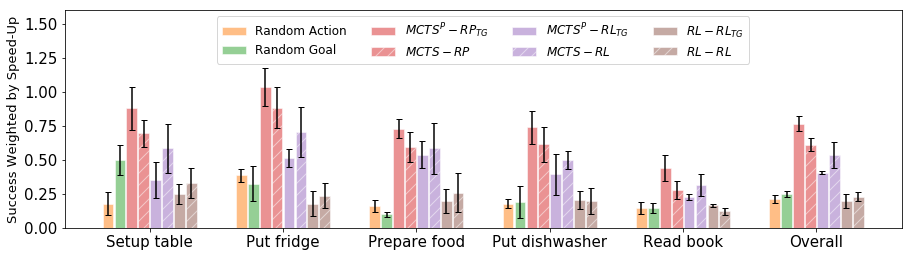

In [259]:
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['random', 'randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL', 'check_neurips_RL_RL_pred']
w = 14
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'SWS'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# matplotlib.rc('font', **font)
iter_col = 0
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 10
    iter_col += 1
    if 'pred' in methods[it]:
        iter_col -= 1
    
    curr_col = colors[iter_col]
    if 'pred' in methods[it]:
        ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb*0.9,
               yerr=content[metric][method][1], label=process_method(method),
               align='center', alpha=0.5, ecolor='black', capsize=3, color=curr_col, hatch='//', edgecolor='white')
    else:
        ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb*0.9,
               yerr=content[metric][method][1], label=process_method(method),
               align='center', alpha=0.5, ecolor='black', capsize=3, color=curr_col, edgecolor='white')
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 1.6])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Success Weighted by Speed-Up', fontsize=13)


plt.legend(loc='upper center', ncol=4, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=15)
# matplotlib.rc('xtick', labelsize=20

# plt.grid(True, linestyle='--', axis='y')
plt.savefig('SWS_plot.pdf')


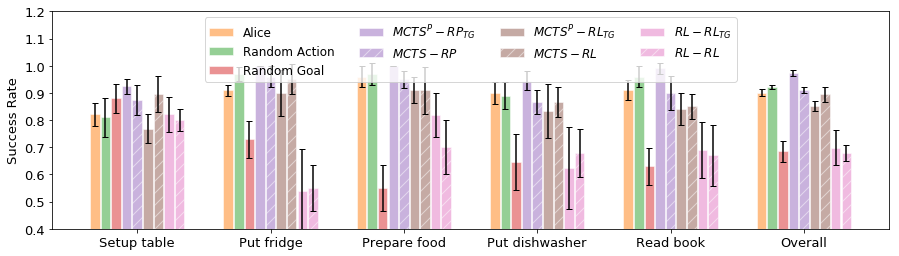

In [261]:
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['check_neurips_test', 'random', 'randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL', 'check_neurips_RL_RL_pred']
w = 14
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'S'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# matplotlib.rc('font', **font)
iter_col = 0
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 10
    iter_col += 1
    if 'pred' in methods[it]:
        iter_col -= 1
    
    curr_col = colors[iter_col]
    if 'pred' in methods[it]:
        ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb*0.9,
               yerr=content[metric][method][1], label=process_method(method),
               align='center', alpha=0.5, ecolor='black', capsize=3, color=curr_col, hatch='//', edgecolor='white')
    else:
        ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb*0.9,
               yerr=content[metric][method][1], label=process_method(method),
               align='center', alpha=0.5, ecolor='black', capsize=3, color=curr_col, edgecolor='white')
ax.set_xticks(x_pos*w)
ax.set_ylim([0.4, 1.2])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Success Rate', fontsize=13)


plt.legend(loc='upper center', ncol=4, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
plt.savefig('SWS_plot.pdf')


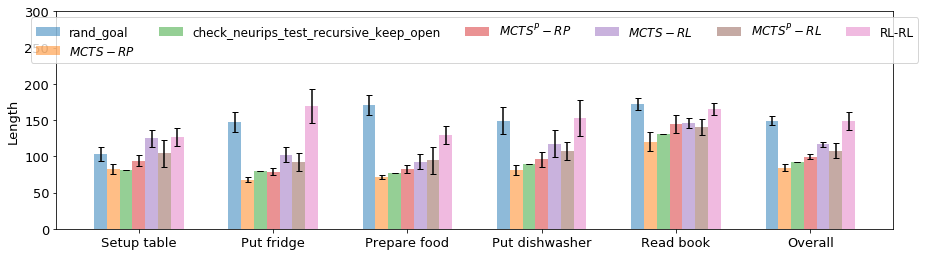

In [53]:
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['randomgoal', 'check_neurips_test_recursive', 'check_neurips_test_recursive_keep_open', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'L'


# matplotlib.rc('font', **font)
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 300])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Length', fontsize=13)


plt.legend(loc='upper center', ncol=6, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
plt.savefig('SWS_plot.pdf', format='eps')

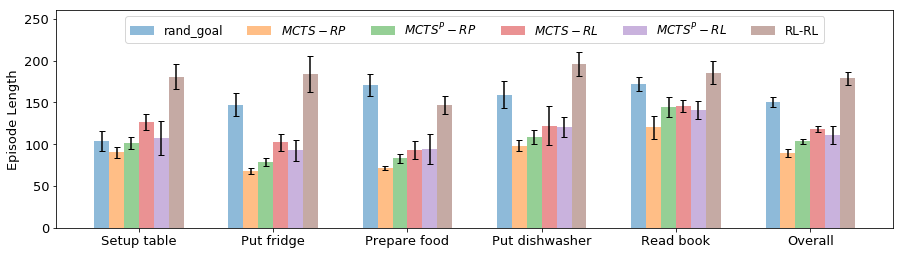

In [44]:
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'L'


# matplotlib.rc('font', **font)
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 260])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Episode Length', fontsize=13)


plt.legend(loc='upper center', ncol=6, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
plt.savefig('SWS_plot.pdf', format='eps')

KeyError: 'test'

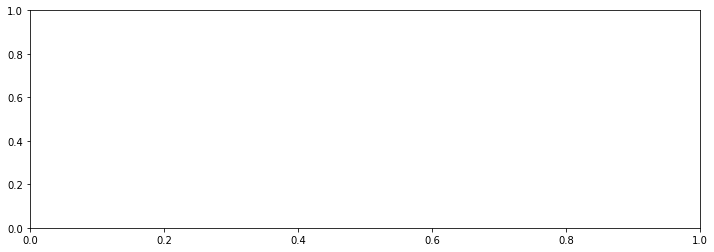

In [29]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots()
methods = ['test', 'randomgoal', 'recursive', 'predgoal']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'L'

for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 220])
plt.ylabel(r'Average Length', fontsize=13)

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.legend(loc='upper center', ncol=4, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

In [15]:
with open('results_mcts_all.json', 'r') as f:
    content = json.load(f)

In [112]:
content.keys()

dict_keys(['S', 'SWS', 'L', 'classes'])

In [19]:
content['L']['randomgoal']

[[[105,
   95,
   44,
   65,
   104,
   43,
   63,
   42,
   66,
   40,
   250,
   63,
   160,
   97,
   138,
   78,
   84,
   131,
   101,
   119,
   101,
   66,
   53,
   77,
   65,
   63,
   40,
   47,
   64,
   95,
   250,
   60,
   250,
   86,
   99,
   61,
   85,
   122,
   80,
   250,
   85,
   86,
   56,
   250,
   86,
   65,
   65,
   39,
   51,
   86,
   61,
   59,
   118,
   86,
   137,
   73,
   104,
   88,
   86,
   122,
   34,
   78,
   104,
   105,
   77,
   250,
   68,
   87,
   85,
   250,
   54,
   134,
   250,
   128,
   57,
   82,
   83,
   250,
   93,
   88,
   45,
   111,
   102,
   64,
   81,
   67,
   98,
   68,
   250,
   85,
   130,
   79,
   125,
   81,
   250,
   77,
   250],
  [105,
   74,
   250,
   250,
   250,
   250,
   36,
   250,
   250,
   93,
   194,
   171,
   110,
   70,
   181,
   100,
   109,
   250,
   158,
   102,
   78,
   45,
   250,
   86,
   164,
   250,
   69,
   138,
   93,
   69,
   170,
   182,
   86,
   48,
   182,
   143,
   250,
   

Text(0.5, 0, 'Steps Episode')

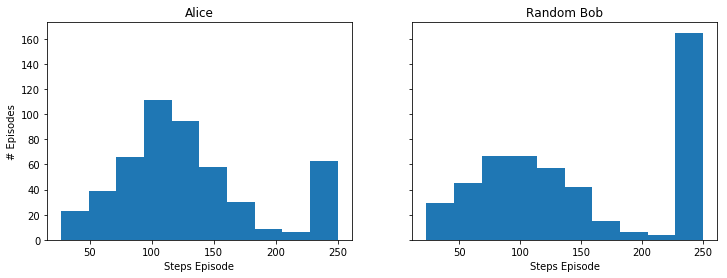

In [138]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots(1, 2, sharey=True)
# ax.ylabel("")
ax[0].hist(content['L']['test'][0][-1], label="alice")
ax[0].set_title("Alice")
ax[0].set_ylabel("# Episodes")
ax[0].set_xlabel("Steps Episode")
ax[1].hist(content['L']['randomgoal'][0][-1], label="random_bob")
ax[1].set_title("Random Bob")
ax[1].set_xlabel("Steps Episode")


In [124]:
content['L']['randomgoal'][0]

[[105,
  95,
  44,
  65,
  104,
  43,
  63,
  42,
  66,
  40,
  250,
  63,
  160,
  97,
  138,
  78,
  84,
  131,
  101,
  119,
  101,
  66,
  53,
  77,
  65,
  63,
  40,
  47,
  64,
  95,
  250,
  60,
  250,
  86,
  99,
  61,
  85,
  122,
  80,
  250,
  85,
  86,
  56,
  250,
  86,
  65,
  65,
  39,
  51,
  86,
  61,
  59,
  118,
  86,
  137,
  73,
  104,
  88,
  86,
  122,
  34,
  78,
  104,
  105,
  77,
  250,
  68,
  87,
  85,
  250,
  54,
  134,
  250,
  128,
  57,
  82,
  83,
  250,
  93,
  88,
  45,
  111,
  102,
  64,
  81,
  67,
  98,
  68,
  250,
  85,
  130,
  79,
  125,
  81,
  250,
  77,
  250],
 [105,
  74,
  250,
  250,
  250,
  250,
  36,
  250,
  250,
  93,
  194,
  171,
  110,
  70,
  181,
  100,
  109,
  250,
  158,
  102,
  78,
  45,
  250,
  86,
  164,
  250,
  69,
  138,
  93,
  69,
  170,
  182,
  86,
  48,
  182,
  143,
  250,
  250,
  141,
  99,
  250,
  79,
  250,
  55,
  250,
  250,
  89,
  250,
  92,
  102,
  141,
  128,
  107,
  100,
  250,
  121,
  250,
  

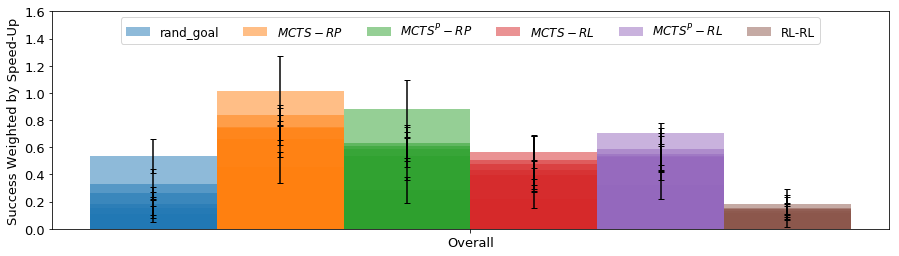

In [52]:
def process_method(method):
    trans_dict = {
        'check_neurips_test': 'alice',
        'randomgoal': 'rand_goal',
        'predgoal_correct': r'$MCTS^P-RP$',
        'check_neurips_test_recursive': r'$MCTS-RP$', 
        'check_neurips_RL_MCTS': r'$MCTS-RL$',  
        'check_neurips_RL_MCTS_pred': r'$MCTS^P-RL$',
        'check_neurips_RL_RL': r'RL-RL'
    }
    return trans_dict[method]


with open('results_mcts_across_seeds_all_baselines_multitask.json', 'r') as f:
    content = json.load(f)

    
classes = ['Overall']
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'SWS'


# matplotlib.rc('font', **font)
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 1.6])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Success Weighted by Speed-Up', fontsize=13)


plt.legend(loc='upper center', ncol=6, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
# plt.savefig('SWS_plot.pdf', format='eps')


No handles with labels found to put in legend.


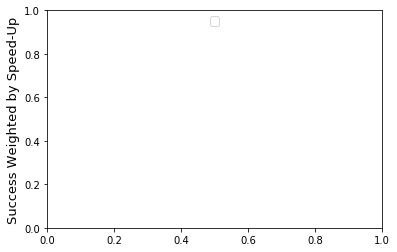

In [53]:
    
classes = ['Overall']
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'S'


# matplotlib.rc('font', **font)
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 1.6])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Success Weighted by Speed-Up', fontsize=13)


plt.legend(loc='upper center', ncol=6, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
# plt.savefig('SWS_plot.pdf', format='eps')

No handles with labels found to put in legend.


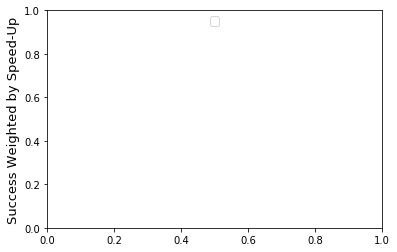

In [54]:
    
classes = ['Overall']
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
methods = ['randomgoal', 'check_neurips_test_recursive', 'predgoal_correct', 'check_neurips_RL_MCTS', 'check_neurips_RL_MCTS_pred', 'check_neurips_RL_RL']
w = 12
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'L'


# matplotlib.rc('font', **font)
for it, method in enumerate(methods):
    offset = it + 0.5 - len(methods)/2
    wb = w* 8
    ax.bar(x_pos*w+offset*wb,  content[metric][method][0], width=wb,
           yerr=content[metric][method][1], label=process_method(method),
           align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_xticks(x_pos*w)
ax.set_ylim([0, 1.6])

ax.set_xticklabels([x.replace('_', ' ').capitalize() for x in classes], fontsize=12)
plt.ylabel(r'Success Weighted by Speed-Up', fontsize=13)


plt.legend(loc='upper center', ncol=6, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)

# plt.grid(True, linestyle='--', axis='y')
# plt.savefig('SWS_plot.pdf', format='eps')

In [120]:
import pickle as pkl
import pickle

def get_metrics(alice_results, test_results, episode_ids):
    # if len(alice_results.keys()) != len(test_results.keys()):
    #     print(alice_results.keys())
    #     print(test_results.keys())
    #     print('different numbers of episodes:', len(alice_results.keys()), len(test_results.keys()))
    #     # return 0, 0, 0
    mS = []
    mL = []
    mSwS = []
    
    stdS = []
    stdL = []
    stdSwS = []
    # pdb.set_trace()
    

    alice_S = []
    alice_L = []
    ids = []
    for episode_id in episode_ids:
        Ls = []
        Ss = []
        SWSs = []
        if episode_id in [31,32,86]:
            continue

        L_A_seeds = []
        for seed_alice in range(5):
            if episode_id not in alice_results:
                S_A, L_A = 0, 250
                pdb.set_trace()
                # continue
            else:
                if alice_results[episode_id]['S'][seed_alice] == '':
                    continue

                S_A = alice_results[episode_id]['S'][seed_alice]
                L_A = alice_results[episode_id]['L'][seed_alice]
                L_A_seeds.append(L_A)
        if episode_id not in test_results:
            S_B, L_B = 0, 250
            # pdb.set_trace()
            # continue
        else:
            for seed in range(5):
                try:
                    if test_results[episode_id]['S'][seed] == '':
                        continue

                    S_B = test_results[episode_id]['S'][seed]
                    L_B = test_results[episode_id]['L'][seed]
                    if L_B == 250:
                        S_B = 0.
                except:
                    pdb.set_trace()
                # if S_B < 0.6:
                #     pdb.set_trace()
                L_A_seeds = np.mean(L_A)
                Ls.append(L_B)
                Ss.append(S_B)
                if L_B == 250 or S_B == 0:
                    pass
                else:
                    SWSs.append(0 if S_B < 1 else max(L_A_seeds / L_B - 1.0, 0))
            mS.append(np.mean(Ss))
            mSwS.append(np.mean(SWSs))
            mL.append(np.mean(Ls))
            stdS.append(np.std(Ss)) 
            stdL.append(np.std(Ls))  
            stdSwS.append(np.std(SWSs))
            ids.append(episode_id)
#         if SWSs[-1] == 0:
#             pass
# #             print(episode_id, seed)
#         if S_A > 0 and SWSs[-1] > 1.:
#             pass
            # pdb.set_trace()
            # print(episode_id)
    # print('Alice:', np.mean(alice_S), np.mean(alice_L))
    # print('Alice:', np.mean(alice_S), '({})'.format(np.std(alice_S)), np.mean(alice_L), '({})'.format(np.std(alice_L)))
    # print('Bob:', np.mean(Ss), '({})'.format(np.std(Ss)), np.mean(Ls), '({})'.format(np.std(Ls)), np.mean(SWSs), '({})'.format(np.std(SWSs)))
    
    return mS, mSwS,mL, stdS, stdL, stdSwS, ids


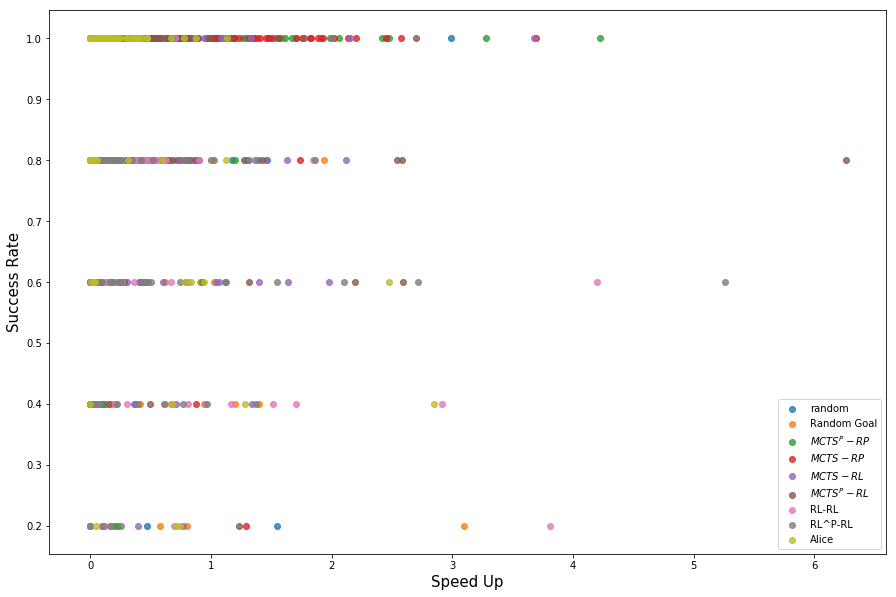

In [121]:

record_dir_alice = '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
alice_results = pickle.load(open(record_dir_alice + '/results_{}.pik'.format(0), 'rb'))
env_task_set = pickle.load(open('../../data_challenge//test_env_set_help_20_neurips.pik', 'rb'))

fig = plt.figure(figsize=(15,10))
 
# args.record_dir = '../record/init7_Bob_test_set_{}'.format(args.num_per_task)
# record_dirs = [
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
#     '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
#  '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
# ]

record_dirs = [
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_random',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
 # '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal_correct', ###
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS_pred',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL', #
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL_pred',  #
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive_keep_open',
 '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test',

]
# record_dirs = [record_dirs[-1]]
for record_dir in record_dirs:
    test_results = pickle.load(open(record_dir + '/results_{}.pkl'.format('redo'), 'rb'))
    method_name = record_dir.split('20_')[-1]

    num_agents = 1

    episode_ids = list(range(len(env_task_set)))

    SRO, SWSO, ALO, stdRO, stdSWSO, stdLO, ids = get_metrics(alice_results, test_results, episode_ids)
    mn = record_dir.split('20_')[-1]
    method_name = process_method(mn)
    plt.scatter(SWSO, SRO, label=method_name, alpha=0.8)
    
plt.ylabel('Success Rate', fontsize=15)
plt.xlabel('Speed Up', fontsize=15)
plt.legend()

In [71]:
pwd

'/data/vision/torralba/frames/data_acquisition/SyntheticStories/MultiAgent/challenge/vh_multiagent_models/interface'

In [229]:
import pickle as pkl
import pickle

def get_metrics(alice_results, test_results, episode_ids):
    # if len(alice_results.keys()) != len(test_results.keys()):
    #     print(alice_results.keys())
    #     print(test_results.keys())
    #     print('different numbers of episodes:', len(alice_results.keys()), len(test_results.keys()))
    #     # return 0, 0, 0
    mS = []
    mL = []
    mSwS = []
    
    # pdb.set_trace()
    


    ids = []
    for seed in range(5):
        Ls = []
        Ss = []
        SWSs = []
        for episode_id in episode_ids:

            if episode_id in [31,32,86]:
                continue

            L_A_seeds = []
            for seed_alice in range(5):
                if episode_id not in alice_results:
                    S_A, L_A = 0, 250
                    pdb.set_trace()
                    # continue
                else:
                    if alice_results[episode_id]['S'][seed_alice] == '':
                        continue

                    S_A = alice_results[episode_id]['S'][seed_alice]
                    L_A = alice_results[episode_id]['L'][seed_alice]
                    L_A_seeds.append(L_A)
            if episode_id not in test_results:
#                 S_B, L_B = 0, 250
                continue
                # pdb.set_trace()
                # continue
            else:

                try:
                    if test_results[episode_id]['S'][seed] == '':
                        continue

                    S_B = test_results[episode_id]['S'][seed]
                    L_B = test_results[episode_id]['L'][seed]
                    if L_B == 250:
                        S_B = 0.
                except:
                    pdb.set_trace()
                # if S_B < 0.6:
                #     pdb.set_trace()
            L_A_seeds = np.mean([t for t in L_A_seeds])
            Ls.append(L_B)
            Ss.append(S_B)
#             print(L_A_seeds, L_B)
            if L_B == 250 or S_B == 0:
#                 SWSs.append(L_B / L_A_seeds)
                continue
                #SWSs.append(L_A_seeds / L_B - 1.0)
            else:
#                 SWSs.append(L_B / L_A_seeds)
                SWSs.append(L_A_seeds / L_B - 1.0)
#                 SWSs.append(0 if S_B < 1 else max(L_A_seeds / L_B - 1.0, 0))
                
        mS.append(np.mean(Ss))
        mSwS.append(np.mean(SWSs))
        mL.append(np.mean(Ls))
#             if SWSs[-1] == 0:
#                 pass
#     #             print(episode_id, seed)
#             if S_A > 0 and SWSs[-1] > 1.:
#                 pass
                # pdb.set_trace()
                # print(episode_id)
        # print('Alice:', np.mean(alice_S), np.mean(alice_L))
        # print('Alice:', np.mean(alice_S), '({})'.format(np.std(alice_S)), np.mean(alice_L), '({})'.format(np.std(alice_L)))
        # print('Bob:', np.mean(Ss), '({})'.format(np.std(Ss)), np.mean(Ls), '({})'.format(np.std(Ls)), np.mean(SWSs), '({})'.format(np.std(SWSs)))
    
    return np.mean(mS), np.mean(mL), np.mean(mSwS), np.std(mS), np.std(mL),  np.std(mSwS), []



In [295]:
import pickle as pkl
import pickle

def get_metrics_all_num(alice_results, test_results, episode_ids):
    # if len(alice_results.keys()) != len(test_results.keys()):
    #     print(alice_results.keys())
    #     print(test_results.keys())
    #     print('different numbers of episodes:', len(alice_results.keys()), len(test_results.keys()))
    #     # return 0, 0, 0
    mS = []
    mL = []
    mSwS = []
    
    # pdb.set_trace()
    


    ids = []
    for seed in range(5):
        Ls = []
        Ss = []
        SWSs = []
        for episode_id in episode_ids:

            if episode_id in [31,32,86]:
                continue

            L_A_seeds = []
            for seed_alice in range(5):
                if episode_id not in alice_results:
                    S_A, L_A = 0, 250
                    pdb.set_trace()
                    # continue
                else:
                    if alice_results[episode_id]['S'][seed_alice] == '':
                        continue

                    S_A = alice_results[episode_id]['S'][seed_alice]
                    L_A = alice_results[episode_id]['L'][seed_alice]
                    L_A_seeds.append(L_A)
            if episode_id not in test_results:
#                 S_B, L_B = 0, 250
                continue
                # pdb.set_trace()
                # continue
            else:

                try:
                    if test_results[episode_id]['S'][seed] == '':
                        continue

                    S_B = test_results[episode_id]['S'][seed]
                    L_B = test_results[episode_id]['L'][seed]
                    if L_B == 250:
                        S_B = 0.
                except:
                    pdb.set_trace()
                # if S_B < 0.6:
                #     pdb.set_trace()
            L_A_seeds = np.mean([t for t in L_A_seeds])
            Ls.append(L_B)
            Ss.append(S_B)
#             print(L_A_seeds, L_B)
            if L_B == 250 or S_B == 0:
                SWSs.append(L_B / L_A_seeds)
                #continue
                #SWSs.append(L_A_seeds / L_B - 1.0)
            else:
                SWSs.append(L_B / L_A_seeds)
#                 SWSs.append(L_A_seeds / L_B - 1.0)
#                 SWSs.append(0 if S_B < 1 else max(L_A_seeds / L_B - 1.0, 0))
                
        mS.append(np.mean(Ss))
        mSwS.append(np.mean(SWSs))
        mL.append(np.mean(Ls))
#             if SWSs[-1] == 0:
#                 pass
#     #             print(episode_id, seed)
#             if S_A > 0 and SWSs[-1] > 1.:
#                 pass
                # pdb.set_trace()
                # print(episode_id)
        # print('Alice:', np.mean(alice_S), np.mean(alice_L))
        # print('Alice:', np.mean(alice_S), '({})'.format(np.std(alice_S)), np.mean(alice_L), '({})'.format(np.std(alice_L)))
        # print('Bob:', np.mean(Ss), '({})'.format(np.std(Ss)), np.mean(Ls), '({})'.format(np.std(Ls)), np.mean(SWSs), '({})'.format(np.std(SWSs)))
    
    return np.mean(mS), np.mean(mL), np.mean(mSwS), np.std(mS)/len(mS), np.std(mL)/len(mL),  np.std(mSwS)/len(mSwS), []



In [296]:

def get_metrics_part_den(alice_results, test_results, episode_ids):
    # if len(alice_results.keys()) != len(test_results.keys()):
    #     print(alice_results.keys())
    #     print(test_results.keys())
    #     print('different numbers of episodes:', len(alice_results.keys()), len(test_results.keys()))
    #     # return 0, 0, 0
    mS = []
    mL = []
    mSwS = []
    
    # pdb.set_trace()
    


    ids = []
    for seed in range(5):
        Ls = []
        Ss = []
        SWSs = []
        for episode_id in episode_ids:

            if episode_id in [31,32,86]:
                continue

            L_A_seeds = []
            for seed_alice in range(5):
                if episode_id not in alice_results:
                    S_A, L_A = 0, 250
                    pdb.set_trace()
                    # continue
                else:
                    if alice_results[episode_id]['S'][seed_alice] == '':
                        continue

                    S_A = alice_results[episode_id]['S'][seed_alice]
                    L_A = alice_results[episode_id]['L'][seed_alice]
                    if L_A < 250:
                        L_A_seeds.append(L_A)
            if episode_id not in test_results:
#                 S_B, L_B = 0, 250
                continue
                # pdb.set_trace()
                # continue
            else:

                try:
                    if test_results[episode_id]['S'][seed] == '':
                        continue

                    S_B = test_results[episode_id]['S'][seed]
                    L_B = test_results[episode_id]['L'][seed]
                    if L_B == 250:
                        S_B = 0.
                except:
                    pdb.set_trace()
                # if S_B < 0.6:
                #     pdb.set_trace()
            L_A_seeds = np.mean([t for t in L_A_seeds])
            Ls.append(L_B)
            Ss.append(S_B)
#             print(L_A_seeds, L_B)
            if L_B == 250 or S_B == 0:
                #SWSs.append(L_B / L_A_seeds)
                continue
                #SWSs.append(L_A_seeds / L_B - 1.0)
            else:
                SWSs.append(L_B / L_A_seeds)
#               SWSs.append(L_A_seeds / L_B - 1.0)
#               SWSs.append(0 if S_B < 1 else max(L_A_seeds / L_B - 1.0, 0))
                
        mS.append(np.mean(Ss))
        mSwS.append(np.mean(SWSs))
        mL.append(np.mean(Ls))
#             if SWSs[-1] == 0:
#                 pass
#     #             print(episode_id, seed)
#             if S_A > 0 and SWSs[-1] > 1.:
#                 pass
                # pdb.set_trace()
                # print(episode_id)
        # print('Alice:', np.mean(alice_S), np.mean(alice_L))
        # print('Alice:', np.mean(alice_S), '({})'.format(np.std(alice_S)), np.mean(alice_L), '({})'.format(np.std(alice_L)))
        # print('Bob:', np.mean(Ss), '({})'.format(np.std(Ss)), np.mean(Ls), '({})'.format(np.std(Ls)), np.mean(SWSs), '({})'.format(np.std(SWSs)))
    
    return np.mean(mS), np.mean(mL), np.mean(mSwS), np.std(mS)/len(mS), np.std(mL)/len(mL),  np.std(mSwS)/len(mSwS), []


Text(0, 0.5, 'Speed Up')

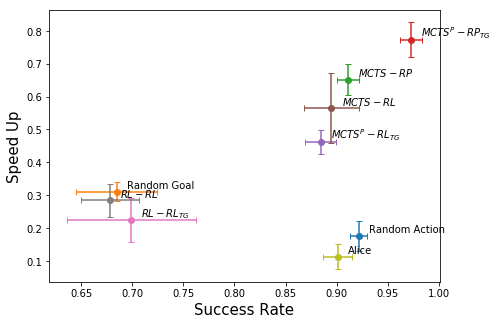

In [297]:

record_dir_alice = '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
alice_results = pickle.load(open(record_dir_alice + '/results_{}.pik'.format(0), 'rb'))
env_task_set = pickle.load(open('../../data_challenge//test_env_set_help_20_neurips.pik', 'rb'))

fig = plt.figure(figsize=(7 ,5))
 
# args.record_dir = '../record/init7_Bob_test_set_{}'.format(args.num_per_task)
# record_dirs = [
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
#     '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
#  '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
# ]

record_dirs = [
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_random',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
 # '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal_correct', ###
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS_pred',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL', #
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL_pred',  #
# '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive_keep_open',
 '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test',

]
# record_dirs = [record_dirs[-2]]
# record_dirs = [record_dirs[-1]]
for record_dir in record_dirs:
    test_results = pickle.load(open(record_dir + '/results_{}.pkl'.format('redo'), 'rb'))
    method_name = record_dir.split('20_')[-1]

    num_agents = 1

    episode_ids = list(range(len(env_task_set)))

    SRO, ALO, SWSO, stdRO, stdLO, stdSWSO, ids = get_metrics(alice_results, test_results, episode_ids)
#     print(ALO)
    print(SWSO)
    mn = record_dir.split('20_')[-1]
    method_name = process_method(mn)
    plt.errorbar(SRO, SWSO, xerr=stdRO, yerr=stdSWSO, label=method_name, alpha=1.0, fmt='--o', capsize=3)
    plt.annotate(method_name, (SRO+0.01, SWSO+0.01))
plt.xlabel('Success Rate', fontsize=15)
plt.ylabel('Speed Up', fontsize=15)
# plt.legend()

0.9744093866981641
1.219552886131918
0.7841044871422811
0.6678607984307449
0.901487442607533
0.8650555861318022
1.2012283722528974
1.2456578478286868
1.0


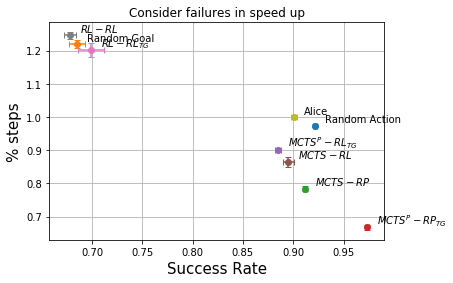

In [305]:
for record_dir in record_dirs:
    test_results = pickle.load(open(record_dir + '/results_{}.pkl'.format('redo'), 'rb'))
    method_name = record_dir.split('20_')[-1]

    num_agents = 1

    episode_ids = list(range(len(env_task_set)))

    SRO, ALO, SWSO, stdRO, stdLO, stdSWSO, ids = get_metrics_all_num(alice_results, test_results, episode_ids)
#     print(ALO)
    print(SWSO)
    mn = record_dir.split('20_')[-1]
    method_name = process_method(mn)
    plt.errorbar(SRO, SWSO, xerr=stdRO, yerr=stdSWSO, label=method_name, alpha=1.0, fmt='--o', capsize=3)
    plt.annotate(method_name, (SRO+0.01, SWSO+0.01))
plt.xlabel('Success Rate', fontsize=15)
plt.ylabel('% steps', fontsize=15)
plt.title("Consider failures in speed up")
# plt.legend()
plt.grid()

0.9801736385175541
1.0233648636143238
1.0249040438911028
0.8855422876117055
0.9041881849649606
0.886701964252062
0.9216465405964904
1.00559795990827
1.0017422538571308


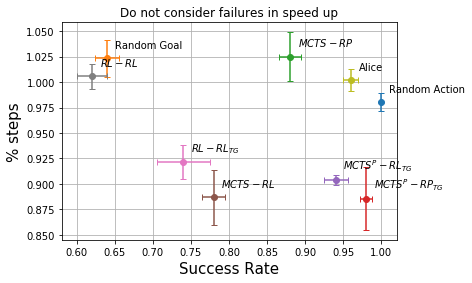

In [310]:
for record_dir in record_dirs:
    test_results = pickle.load(open(record_dir + '/results_{}.pkl'.format('redo'), 'rb'))
    method_name = record_dir.split('20_')[-1]

    num_agents = 1

    episode_ids = list(range(len(env_task_set)))
    episode_ids = list(range(10))
    SRO, ALO, SWSO, stdRO, stdLO, stdSWSO, ids = get_metrics_part_den(alice_results, test_results, episode_ids)
#     print(ALO)
    print(SWSO)
    mn = record_dir.split('20_')[-1]
    method_name = process_method(mn)
    plt.errorbar(SRO, SWSO, xerr=stdRO, yerr=stdSWSO, label=method_name, alpha=1.0, fmt='--o', capsize=3)
    plt.annotate(method_name, (SRO+0.01, SWSO+0.01))
plt.xlabel('Success Rate', fontsize=15)
plt.ylabel('% steps', fontsize=15)
# plt.legend()
plt.title("")
plt.title("Do not consider failures in speed up")
plt.grid()


In [313]:

def get_metrics_across_episodes(alice_results, test_results, episode_ids):
    # if len(alice_results.keys()) != len(test_results.keys()):
    #     print(alice_results.keys())
    #     print(test_results.keys())
    #     print('different numbers of episodes:', len(alice_results.keys()), len(test_results.keys()))
    #     # return 0, 0, 0
    mS = []
    mL = []
    mSwS = []
    
    # pdb.set_trace()
    


    ids = []
    for episode_id in episode_ids:
#     for seed in range(5):
        Ls = []
        Ss = []
        SWSs = []

        if episode_id in [31,32,86]:
            continue
        ########
        ## Alice
        #######
        L_A_seeds = []
        for seed_alice in range(5):
            if episode_id not in alice_results:
                S_A, L_A = 0, 250
                pdb.set_trace()
                # continue
            else:
                if alice_results[episode_id]['S'][seed_alice] == '':
                    continue

                S_A = alice_results[episode_id]['S'][seed_alice]
                L_A = alice_results[episode_id]['L'][seed_alice]
#                 if L_A < 250:
                L_A_seeds.append(L_A)
        if episode_id not in test_results:
#                 S_B, L_B = 0, 250
            continue
            # pdb.set_trace()
            # continue
        L_A_seeds = np.mean([t for t in L_A_seeds])
        Ls = []
        Ss = []
        for seed_bob in range(5):
            try:
                if test_results[episode_id]['S'][seed_bob] == '':
                    continue

                S_B = test_results[episode_id]['S'][seed_bob]
                L_B = test_results[episode_id]['L'][seed_bob]
                if L_B == 250:
                    S_B = 0.
            except:
                pdb.set_trace()
               
            Ls.append(L_B)
            Ss.append(S_B)
        
#         SWSs = L_A_seeds / np.mean([t for t in Ls if t < 250]) - 1.0
#         if len([t for t in Ls if t < 250]) > 0:
#             mSwS.append(SWSs)
            
        SWSs = L_A_seeds / np.mean(Ls) - 1.0
        mSwS.append(SWSs)
        mS.append(np.mean(Ss))
#         mSwS.append(SWSs)
        mL.append(np.mean([Ls]))
#             if SWSs[-1] == 0:
#                 pass
#     #             print(episode_id, seed)
#             if S_A > 0 and SWSs[-1] > 1.:
#                 pass
                # pdb.set_trace()
                # print(episode_id)
        # print('Alice:', np.mean(alice_S), np.mean(alice_L))
        # print('Alice:', np.mean(alice_S), '({})'.format(np.std(alice_S)), np.mean(alice_L), '({})'.format(np.std(alice_L)))
        # print('Bob:', np.mean(Ss), '({})'.format(np.std(Ss)), np.mean(Ls), '({})'.format(np.std(Ls)), np.mean(SWSs), '({})'.format(np.std(SWSs)))
    ns = np.sqrt(len(mS))
    nw = np.sqrt(len(mSwS))
    return np.mean(mS), np.mean(mL), np.mean(mSwS), np.std(mS)/ns, np.std(mL)/ns,  np.std(mSwS)/nw, []


0.06577882423576423
-0.03820822007710577
0.4464374926761859
0.6186978183317232
0.1975666484183691
0.26006754916580876
-0.11521209286950398
-0.11788849282206006
0.0


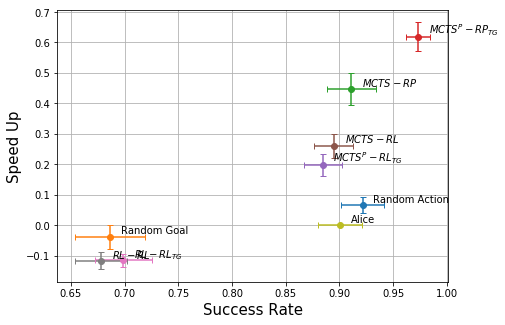

In [314]:

record_dir_alice = '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
alice_results = pickle.load(open(record_dir_alice + '/results_{}.pik'.format(0), 'rb'))
env_task_set = pickle.load(open('../../data_challenge//test_env_set_help_20_neurips.pik', 'rb'))

fig = plt.figure(figsize=(7 ,5))
 
# args.record_dir = '../record/init7_Bob_test_set_{}'.format(args.num_per_task)
# record_dirs = [
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
#  '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
#     '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
#  '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test'
# ]

record_dirs = [
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_random',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_randomgoal',
 # '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_predgoal_correct', ###
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_MCTS_pred',
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL', #
 '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_RL_RL_pred',  #
# '../record_scratch/rec_good_test/multiBob_env_task_set_20_check_neurips_test_recursive_keep_open',
 '../record_scratch/rec_good_test/multiAlice_env_task_set_20_check_neurips_test',

]
# record_dirs = [record_dirs[-2]]
# record_dirs = [record_dirs[-1]]
for record_dir in record_dirs:
    test_results = pickle.load(open(record_dir + '/results_{}.pkl'.format('redo'), 'rb'))
    method_name = record_dir.split('20_')[-1]

    num_agents = 1

    episode_ids = list(range(len(env_task_set)))

    SRO, ALO, SWSO, stdRO, stdLO, stdSWSO, ids = get_metrics_across_episodes(alice_results, test_results, episode_ids)
#     print(ALO)
    mn = record_dir.split('20_')[-1]
    method_name = process_method(mn)
    print(SWSO)
    alph = 1.0
    if record_dir.split('/')[-1] == 'multiAlice_env_task_set_20_check_neurips_test':
        alph = 1.0
    plt.errorbar(SRO, SWSO, xerr=stdRO, yerr=stdSWSO, label=method_name, alpha=alph, fmt='--o', capsize=3)
    plt.annotate(method_name, (SRO+0.01, SWSO+0.01))
plt.xlabel('Success Rate', fontsize=15)
plt.ylabel('Speed Up', fontsize=15)
plt.grid()
# plt.legend()